# eyeBlinkFrequency and Duration

In [52]:

"""

https://docs.scipy.org/doc/scipy/reference/signal.html
"""

import pandas as pd 
import numpy as np
import math
import csv

import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks, peak_widths

df = pd.read_csv('D4_W1-W9.csv')

def peaks (x):
#     x = x * (-1)
    peaks, _ = find_peaks(x, height=-5) # peaks when height <-5
    results_half = peak_widths(x, peaks, rel_height=0.5) # duration between |height| >0.5*prominent
    results_half[0] # all width
    return len (peaks) ,max (results_half[0]), min (results_half[0]), np.mean ((results_half[0])),np.std(results_half[0])
peaks (x)

eyeBlinkFreq = []
columns = ["D4_1", "D4_2","D4_3","D4_4","D4_5","D4_6","D4_7","D4_8","D4_9"]
for i in columns:
    x = df[i]
#     print (x)
    x = x * (-1)
    peaks (x)
    eyeBlinkFreq.append(peaks (x))
    
df_D4 = pd.DataFrame (eyeBlinkFreq, columns = ['windows''eyeBlinkFreq','maxDuration','minDuration','meanDuration','SDDuration'])

df_D4.insert(0, "Windows", ('1','2','3','4','5','6','7','8','9'))
df_D4
df_D4.to_csv('N2_1-eyeBlinkRate.csv')

    








# Check the eyeBlinkFrequency

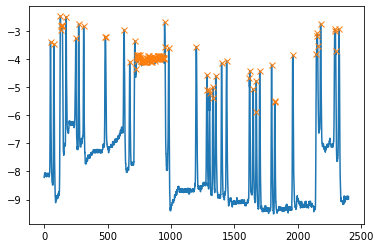

In [48]:
import pandas as pd 
import numpy as np
import math
import csv

import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks, peak_widths

df = pd.read_csv('D4_W1-W9.csv')
df

x = df["D4_8"]
x = x * (-1)

peaks, _ = find_peaks(x, height=-6)
results_half = peak_widths(x, peaks, rel_height=0.5)
plt.plot(x)
plt.plot(peaks, x[peaks],"x")

In [86]:
import pandas as pd 
import numpy as np
import math
import csv


df = pd.read_csv('D4_W1-W9.csv')
df

# x = df["S_D4_1"]



# eyeBlinkFreq = []
columns = ["S_D4_1", "S_D4_2","S_D4_3","S_D4_4","S_D4_5","S_D4_6","S_D4_7","S_D4_8","S_D4_9"]

S_D4_directions = []
for i in columns:
    
    x = df[i]
    a = 0
    b = 0
#     print (x)

    for j in range (len (x)):
        
        if df[i][j] > 0 :
            a = a + df[i][j]
        else :
            b = b + df[i][j]
#     print (a,b)
    S_D4_directions.append ([i,a,b])
    
S_D4_directions

D4_directions = pd.DataFrame (S_D4_directions,columns = ['windows','Outer','Inner'])  
D4_directions


    








,windows,Outer,Inner
0,S_D4_1,96.957807,-2091.295501
1,S_D4_2,6.680618,-3284.082769
2,S_D4_3,162.289427,-3742.429201
3,S_D4_4,149.423711,-4208.383338
4,S_D4_5,205.840760,-4083.678476
5,S_D4_6,145.442945,-4211.473602
6,S_D4_7,134.415907,-4023.538896
7,S_D4_8,476.722856,-3290.716072
8,S_D4_9,76.965795,-4410.638809


In [8]:
import pandas as pd 
import numpy as np
import math
import csv


def sDirection (df):
    df_S = df.loc[:, df.columns.str.startswith('S_')]
    S_directions = []
    columns = list(df_S)
    for i in columns: 
        x = df_S[i]
        a = 0
        b = 0
        c = max (df_S[i])
        d = min (df_S[i])
        e = np.mean (df_S[i])
        f = np.std (df_S[i])
        g = np.sqrt(np.mean(x**2))
        for j in range(len(x)):
            if df_S[i][j] > 0 :
                a = a + df_S[i][j]
            else :
                b = b + df_S[i][j]
#         print (a,b)
        S_directions.append ([i,a,b,c,d,e,f,g])
    return S_directions

filenames = ['D1_W1-W9.csv',
             'D2_W1-W9.csv',
             'D3_W1-W9.csv',
             'D4_W1-W9.csv',
             'D5_W1-W9.csv',
             'D6_W1-W9.csv',
             'D7_W1-W9.csv',
             'D8_W1-W9.csv',
             'D9_W1-W9.csv',
             'D10_W1-W9.csv',
             'D11_W1-W9.csv',
             'D12_W1-W9.csv',
             'L3_W1-W9.csv',
             'L4_W1-W9.csv'
            ]

df = []
for i in filenames:
#     print (i)
      df = pd.read_csv('%s' % i)
      df.columns = df.columns.astype(str)
      df_S = pd.DataFrame (sDirection (df), columns = ['windows','outer','inner','max','min','mean','SD','rms'])
      print (df_S)
      df_S.to_csv('sDirection_%s' % i)
    






  windows        outer       inner       max       min      mean        SD  \
0  S_D1_1   699.426592 -281.634707  4.002886 -0.883385  0.174080  0.785782   
1  S_D1_2   935.493512 -673.401837  3.737148 -1.670601  0.109205  1.045435   
2  S_D1_3   854.584381 -611.525155  3.770064 -1.351547  0.101275  0.983121   
3  S_D1_4  1433.509210 -387.034922  4.197684 -1.637127  0.436031  1.192747   
4  S_D1_5  1348.292362 -479.743758  4.284852 -1.676614  0.361895  1.215005   
5  S_D1_6  1310.402271 -691.226818  4.569375 -1.992346  0.257990  1.236749   
6  S_D1_7  1064.053115 -664.479586  4.158554 -1.435794  0.166489  1.125710   
7  S_D1_8  1541.127308 -767.231943  5.034138 -1.272033  0.322456  1.303562   
8  S_D1_9  1216.682608 -589.439279  4.478294 -1.877015  0.261351  1.101098   

        rms  
0  0.804833  
1  1.051124  
2  0.988323  
3  1.269948  
4  1.267756  
5  1.263371  
6  1.137955  
7  1.342852  
8  1.131690  
  windows       outer        inner       max       min      mean        SD  \
0

   windows        outer        inner       max       min      mean        SD  \
0  S_D10_1   752.114152 -1662.346604  3.449071 -3.406455 -0.379264  1.175225   
1  S_D10_2   366.520967 -1089.194229  2.420366 -3.861774 -0.301114  0.810295   
2  S_D10_3   170.021179 -1918.258358  2.028685 -3.844938 -0.728432  0.774690   
3  S_D10_4     6.687162 -2412.977389  0.243205 -3.556846 -1.002621  0.769319   
4  S_D10_5    18.944471 -2470.491910  0.663198 -5.344485 -1.021478  1.033616   
5  S_D10_6  1082.220270  -809.760534  4.644851 -4.675252  0.113525  1.004280   
6  S_D10_7  1048.239497 -1388.718031  3.333659 -3.166768 -0.141866  1.237442   
7  S_D10_8  1346.054077  -512.969664  4.543728 -4.272774  0.347119  0.972583   
8  S_D10_9  2393.114471   -90.954486  2.829449 -1.975642  0.959233  0.631114   

        rms  
0  1.234907  
1  0.864435  
2  1.063371  
3  1.263764  
4  1.453196  
5  1.010676  
6  1.245547  
7  1.032671  
8  1.148230  
   windows        outer       inner       max       min    

In [2]:
import pandas as pd 
import numpy as np
import math
import csv


def sDirection (df):
    df_S = df.loc[:, df.columns.str.startswith('S_')]
    S_directions = []
    columns = list(df_S)
    for i in columns: 
        x = df_S[i]
        a = 0
        b = 0
        c = max (df_S[i])
        d = min (df_S[i])
        e = np.mean (df_S[i])
        f = np.std (df_S[i])
        g = np.sqrt(np.mean(x**2))
        for j in range(len(x)):
            if df_S[i][j] > 0 :
#                 a = a + df_S[i][j]
                a = a + 1
            else :
#                 b = b + df_S[i][j]
                b = b + 1
#         print (a,b)
        S_directions.append ([i,a/2400,b/2400,c,d,e,f,g])
    return S_directions

filenames = ['D1_W1-W9.csv',
             'D2_W1-W9.csv',
             'D3_W1-W9.csv',
             'D4_W1-W9.csv',
             'D5_W1-W9.csv',
             'D6_W1-W9.csv',
             'D7_W1-W9.csv',
             'D8_W1-W9.csv',
             'D9_W1-W9.csv',
             'D10_W1-W9.csv',
             'D11_W1-W9.csv',
             'D12_W1-W9.csv',
             'L3_W1-W9.csv',
             'L4_W1-W9.csv'
            ]

df = []
for i in filenames:
#     print (i)
      df = pd.read_csv('%s' % i)
      df.columns = df.columns.astype(str)
      df_S = pd.DataFrame (sDirection (df), columns = ['windows','outer','inner','max','min','mean','SD','rms'])
      print (df_S)
      df_S.to_csv('sDirectionCount_%s' % i)
    






  windows     outer     inner       max       min      mean        SD  \
0  S_D1_1  0.443333  0.556667  4.002886 -0.883385  0.174080  0.785782   
1  S_D1_2  0.285000  0.715000  3.737148 -1.670601  0.109205  1.045435   
2  S_D1_3  0.342917  0.657083  3.770064 -1.351547  0.101275  0.983121   
3  S_D1_4  0.535833  0.464167  4.197684 -1.637127  0.436031  1.192747   
4  S_D1_5  0.491667  0.508333  4.284852 -1.676614  0.361895  1.215005   
5  S_D1_6  0.427500  0.572500  4.569375 -1.992346  0.257990  1.236749   
6  S_D1_7  0.412917  0.587083  4.158554 -1.435794  0.166489  1.125710   
7  S_D1_8  0.490417  0.509583  5.034138 -1.272033  0.322456  1.303562   
8  S_D1_9  0.476667  0.523333  4.478294 -1.877015  0.261351  1.101098   

        rms  
0  0.804833  
1  1.051124  
2  0.988323  
3  1.269948  
4  1.267756  
5  1.263371  
6  1.137955  
7  1.342852  
8  1.131690  
  windows     outer     inner       max       min      mean        SD  \
0  S_D2_1  0.035000  0.965000  0.800168 -1.414100 -0.673

   windows     outer     inner       max       min      mean        SD  \
0  S_D11_1  0.754583  0.245417  6.925995 -0.766606  0.950545  1.457004   
1  S_D11_2  1.000000  0.000000  7.980887  0.271211  2.375786  1.188822   
2  S_D11_3  1.000000  0.000000  7.654641  0.831092  2.899467  1.037127   
3  S_D11_4  0.880000  0.120000  3.972873 -1.828935  0.881088  0.968518   
4  S_D11_5  0.909167  0.090833  3.891708 -4.109434  1.080432  1.332919   
5  S_D11_6  0.817083  0.182917  5.325077 -2.079598  1.102776  1.205097   
6  S_D11_7  0.861250  0.138750  7.416116 -0.970893  2.318917  1.858439   
7  S_D11_8  0.939167  0.060833  8.748395 -0.582474  1.935026  2.194091   
8  S_D11_9  0.942917  0.057083  5.011868 -1.045413  1.636392  1.011421   

        rms  
0  1.739655  
1  2.656625  
2  3.079374  
3  1.309329  
4  1.715810  
5  1.633516  
6  2.971729  
7  2.925467  
8  1.923734  
   windows     outer     inner       max       min      mean        SD  \
0  S_D12_1  0.716250  0.283750  6.121661 -0.9

In [26]:
import pandas as pd 
import numpy as np
import math
import csv



filenames = ['sDirectionCount_D1_W1-W9.csv',
             'sDirectionCount_D2_W1-W9.csv',
             'sDirectionCount_D3_W1-W9.csv',
             'sDirectionCount_D4_W1-W9.csv',
             'sDirectionCount_D5_W1-W9.csv',
             'sDirectionCount_D6_W1-W9.csv',
             'sDirectionCount_D7_W1-W9.csv',
             'sDirectionCount_D8_W1-W9.csv',
             'sDirectionCount_D9_W1-W9.csv',
             'sDirectionCount_D10_W1-W9.csv',
             'sDirectionCount_D11_W1-W9.csv',
             'sDirectionCount_D12_W1-W9.csv',
             'sDirectionCount_L3_W1-W9.csv',
             'sDirectionCount_L4_W1-W9.csv'
            ]


df1 = pd.read_csv('sDirectionCount_D1_W1-W9.csv')
df2 = pd.read_csv('sDirectionCount_D2_W1-W9.csv')
df3 = pd.read_csv('sDirectionCount_D3_W1-W9.csv')
df4 = pd.read_csv('sDirectionCount_D4_W1-W9.csv')
df5 = pd.read_csv('sDirectionCount_D5_W1-W9.csv')
df6 = pd.read_csv('sDirectionCount_D6_W1-W9.csv')
df7 = pd.read_csv('sDirectionCount_D7_W1-W9.csv')
df8 = pd.read_csv('sDirectionCount_D8_W1-W9.csv')
df9 = pd.read_csv('sDirectionCount_D9_W1-W9.csv')
df10 = pd.read_csv('sDirectionCount_D10_W1-W9.csv')
df11 = pd.read_csv('sDirectionCount_D11_W1-W9.csv')
df12 = pd.read_csv('sDirectionCount_D12_W1-W9.csv')
df13 = pd.read_csv('sDirectionCount_L3_W1-W9.csv')
df14 = pd.read_csv('sDirectionCount_L4_W1-W9.csv')

df = pd.concat ([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14], axis=1)
df.to_csv('sDirectionCount.csv')

    




